In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('netflix_titles_2021.csv')
print("Original Dataset:")
print(df.head())
df.shape

Original Dataset:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021        2020.0  PG-13     90 min   
1  September 24, 2021        2021.0  TV-MA  2 Seasons   
2  Septembe

(5398, 12)

In [3]:
df.describe()

,release_year
count,5397.000000
mean,2016.083936
std,7.121457
min,1925.000000
25%,2016.000000
50%,2018.000000
75%,2020.000000
max,2021.000000


In [4]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,5398,5398,5397,3515,4903,4735,5397,5397.000000,5397,5397,5397,5397
unique,5398,3,5397,2721,4749,475,1177,NaN,11,208,430,5381
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",United States,"July 1, 2021",NaN,TV-MA,1 Season,Stand-Up Comedy,"Paranormal activity at a lush, abandoned prope..."
freq,1,3464,1,17,14,1545,60,NaN,2246,1258,239,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.083936,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.121457,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.000000,NaN,NaN,NaN,NaN


In [5]:
#Finding how many unique values are in the dataset
df.nunique()

show_id         5398
type               3
title           5397
director        2721
cast            4749
country          475
date_added      1177
release_year      62
rating            11
duration         208
listed_in        430
description     5381
dtype: int64

In [6]:
# Data Cleaning
miss=df.isnull().sum()            # to shows the count of null values
miss

show_id            0
type               0
title              1
director        1883
cast             495
country          663
date_added         1
release_year       1
rating             1
duration           1
listed_in          1
description        1
dtype: int64

In [7]:
df =df.dropna(how='any',subset=['director','cast'])
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021.0,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [8]:
df.fillna({'country':'missing','rating':'missing','duration':'missing'},inplace=True)

In [9]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [10]:
# Preprocessing
df.duplicated().sum()

0

In [13]:
df.shape

(3281, 12)

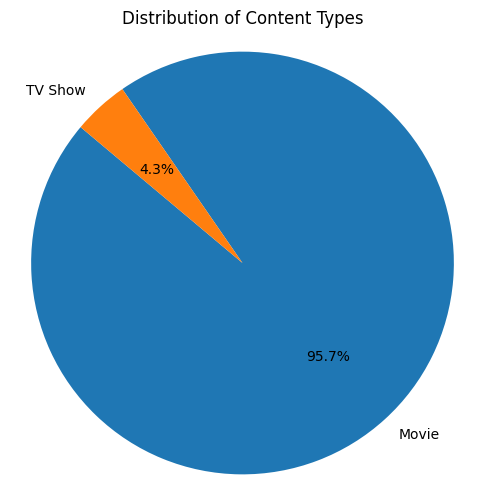

In [14]:
# Pie chart: Distribution of content types (TV Show vs Movie)
content_types = df['type'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(content_types, labels=content_types.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Content Types')
plt.axis('equal')
plt.show()

In [16]:
df.type.value_counts().to_frame('Value_count')

,Value_count
type,
Movie,3141
TV Show,140


([0, 1], [Text(0, 0, 'TV Show'), Text(1, 0, 'Movie')])

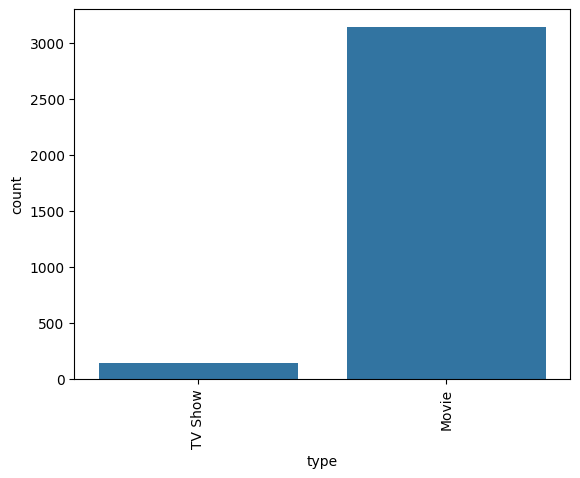

In [20]:
sns.countplot(x=df['type'],orient='v')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'TV-MA'),
  Text(1, 0, 'PG'),
  Text(2, 0, 'TV-14'),
  Text(3, 0, 'PG-13'),
  Text(4, 0, 'TV-PG'),
  Text(5, 0, 'TV-Y'),
  Text(6, 0, 'R'),
  Text(7, 0, 'TV-G'),
  Text(8, 0, 'TV-Y7'),
  Text(9, 0, 'G'),
  Text(10, 0, 'NC-17')])

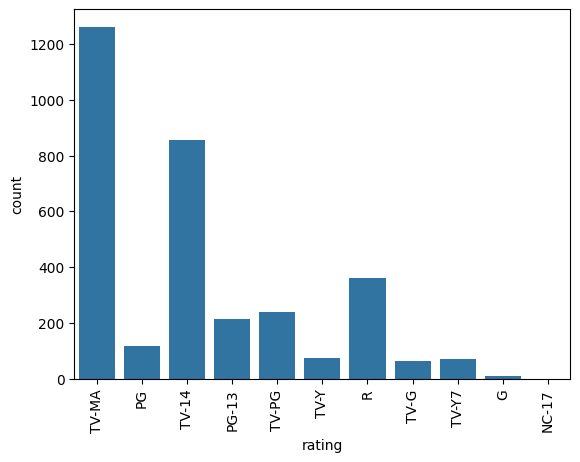

In [21]:
#countplot for distrubution
sns.countplot(x=df['rating'],orient='v')
plt.xticks(rotation=90)

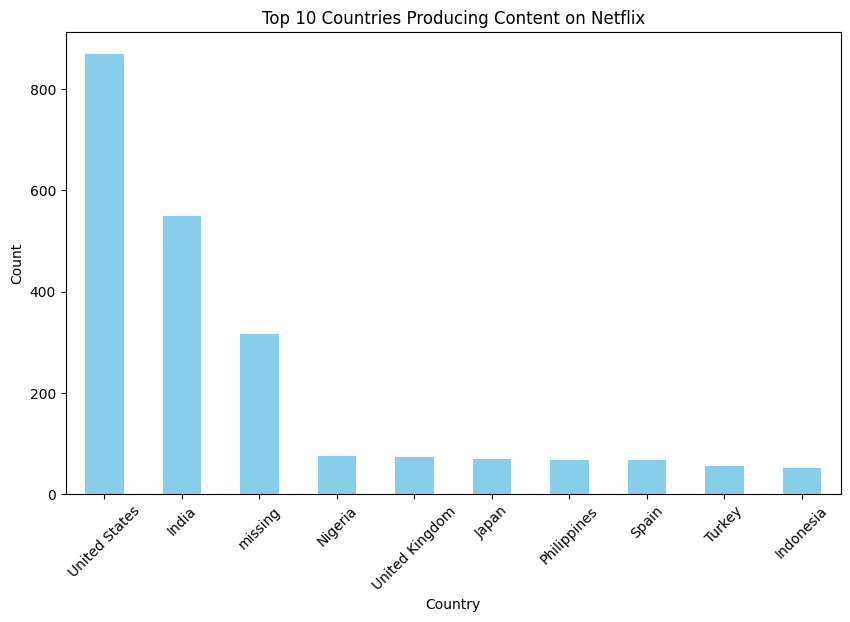

In [15]:
# Bar chart: Distribution of countries producing content
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries Producing Content on Netflix')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [27]:
new_genre = df['listed_in'].str.split(",")
new_genre

2       [Crime TV Shows,  International TV Shows,  TV ...
5                  [TV Dramas,  TV Horror,  TV Mysteries]
6                              [Children & Family Movies]
7       [Dramas,  Independent Movies,  International M...
8                         [British TV Shows,  Reality TV]
                              ...                        
5388    [International TV Shows,  TV Dramas,  TV Myste...
5389    [Children & Family Movies,  Dramas,  Sports Mo...
5391    [Dramas,  International Movies,  Music & Music...
5394                                    [Stand-Up Comedy]
5396     [Classic Movies,  Dramas,  International Movies]
Name: listed_in, Length: 3281, dtype: object

In [28]:
df['Genre 1'] = new_genre.str.get(0)
df['Genre 2'] = new_genre.str.get(1)
df['Genre 3'] = new_genre.str.get(2)
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_final,Genre 1,Genre 2,Genre 3
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,"September 24, 2021",2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,"September 24, 2021",Crime TV Shows,International TV Shows,TV Action & Adventure
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",missing,"September 24, 2021",2021.0,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,"September 24, 2021",TV Dramas,TV Horror,TV Mysteries


In [30]:
df['Genre 1'].describe(include=all)

count       3281
unique        32
top       Dramas
freq         896
Name: Genre 1, dtype: object

In [31]:
df['Genre 2'].describe(include=all)

count                      2632
unique                       33
top        International Movies
freq                       1001
Name: Genre 2, dtype: object

In [32]:
df['Genre 3'].describe(include=all)

count                      1515
unique                       28
top        International Movies
freq                        561
Name: Genre 3, dtype: object

In [33]:
df.drop('listed_in',axis = 1,inplace = True)
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,month_final,Genre 1,Genre 2,Genre 3
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,"September 24, 2021",2021.0,TV-MA,1 Season,To protect his family from a powerful drug lor...,"September 24, 2021",Crime TV Shows,International TV Shows,TV Action & Adventure
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",missing,"September 24, 2021",2021.0,TV-MA,1 Season,The arrival of a charismatic young priest brin...,"September 24, 2021",TV Dramas,TV Horror,TV Mysteries


In [34]:
df.duplicated().sum()

0

In [35]:
df.groupby(['Genre 1'])['release_year'].count().sort_values(ascending = False)

Genre 1
Dramas                          896
Comedies                        735
Action & Adventure              459
Children & Family Movies        320
Stand-Up Comedy                 225
Documentaries                   163
Horror Movies                   139
International Movies             86
International TV Shows           53
Thrillers                        34
Crime TV Shows                   31
Classic Movies                   21
Anime Features                   16
Music & Musicals                 13
Movies                           12
Independent Movies               10
Anime Series                     10
British TV Shows                  9
TV Shows                          8
Stand-Up Comedy & Talk Shows      7
Kids' TV                          6
Docuseries                        6
Sci-Fi & Fantasy                  6
Cult Movies                       4
TV Action & Adventure             2
TV Comedies                       2
TV Dramas                         2
Classic & Cult TV   

In [36]:
df.groupby(['Genre 2'])['release_year'].count().sort_values(ascending = False)

Genre 2
 International Movies            1001
 Dramas                           472
 Independent Movies               275
 Comedies                         255
 Thrillers                        120
 Romantic Movies                   99
 Music & Musicals                  68
 Sci-Fi & Fantasy                  46
 Anime Features                    37
 International TV Shows            35
 Horror Movies                     32
 Sports Movies                     24
 Romantic TV Shows                 19
 TV Dramas                         19
 Faith & Spirituality              18
 Children & Family Movies          16
 LGBTQ Movies                      15
 TV Comedies                       14
 Cult Movies                       12
 Classic Movies                    11
 Korean TV Shows                    8
 TV Action & Adventure              7
 Documentaries                      6
 Stand-Up Comedy                    5
 Crime TV Shows                     4
 TV Horror                          3
 Doc

In [37]:
df.groupby(['Genre 3'])['release_year'].count().sort_values(ascending = False)

Genre 3
 International Movies            561
 Romantic Movies                 288
 Thrillers                       174
 Music & Musicals                125
 Independent Movies               89
 Sports Movies                    51
 Sci-Fi & Fantasy                 50
 Dramas                           39
 TV Dramas                        28
 LGBTQ Movies                     25
 TV Comedies                      14
 TV Mysteries                     10
 Spanish-Language TV Shows         8
 Cult Movies                       7
 TV Action & Adventure             6
 TV Horror                         5
 Romantic TV Shows                 5
 Faith & Spirituality              5
 Comedies                          5
 Children & Family Movies          4
 Classic Movies                    3
 International TV Shows            3
 Teen TV Shows                     3
 Stand-Up Comedy & Talk Shows      2
 TV Sci-Fi & Fantasy               2
 Kids' TV                          1
 Horror Movies                

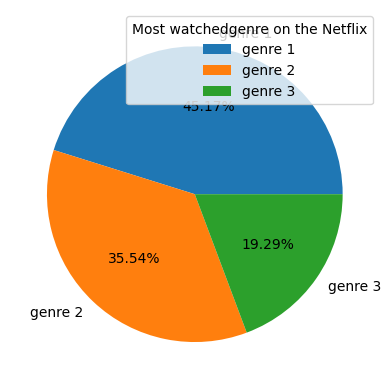

In [38]:
# by using Pie chart
genre_types = ['genre 1','genre 2','genre 3']

Value_count = [5700,4485,2434]
plt.pie(Value_count, labels = genre_types, autopct="%2.2f%%")
plt.legend(title='Most watchedgenre on the Netflix')
plt.show()

In [40]:
df["director"].value_counts().head(10)

director
Rajiv Chilaka             17
Raúl Campos, Jan Suter    14
Marcus Raboy              13
Cathy Garcia-Molina       12
Youssef Chahine           12
Suhas Kadav               12
Jay Chapman                9
Fernando Ayllón            8
Don Michael Paul           8
Hidenori Inoue             7
Name: count, dtype: int64

<Axes: xlabel='director'>

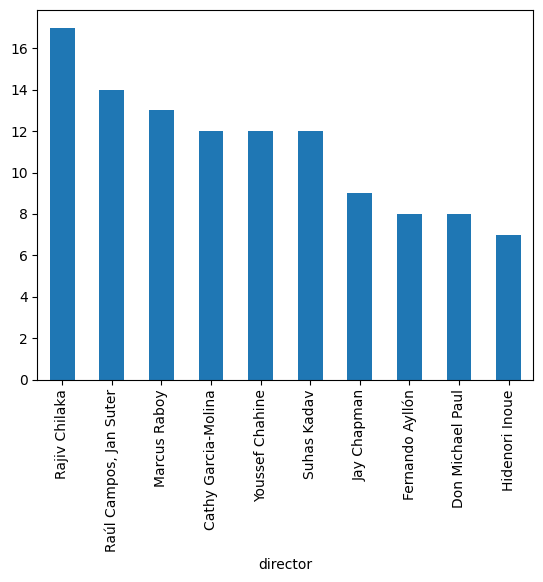

In [41]:
# shown in bar graph
df["director"].value_counts().head(10).plot(kind='bar')